<a href="https://colab.research.google.com/github/chicks2014/Boston_house_price_prediction/blob/main/Boston_dataset_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load required libaries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
import pickle
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline


In [ ]:
# load dataset

boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [ ]:
# view random data
bos.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66,29.8
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,23.1
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,22.0
165,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81,25.0
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10,37.0


# EDA

In [ ]:
# view dataframe shape
bos.shape

(506, 14)

In [ ]:
# describe dataframe
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# dataframe varaibles info
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Missing value analysis**

In [ ]:
# view missing values count for each variable
def calculate_missing_values(df) :
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing_data.head(11)

In [ ]:
calculate_missing_values(bos)

,Total,Percent
PRICE,0,0.0
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


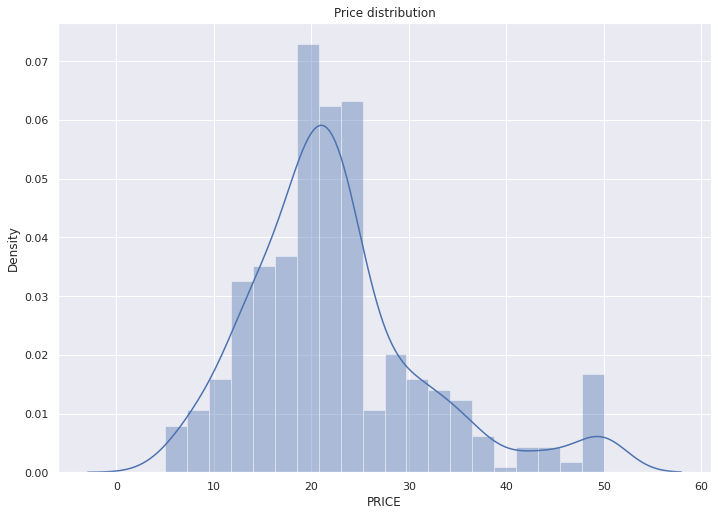

In [ ]:
# Density plot of price
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['PRICE'], bins=20)
plt.title('Price distribution')
plt.show()

**Features selection**

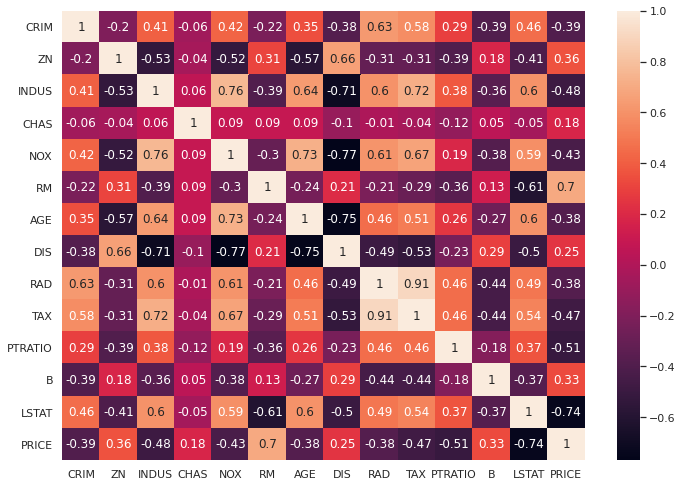

In [ ]:
cor = bos.corr().round(2)
sns.heatmap(cor,annot=True)

**Observations**



*   There are high postive correlation between RAD and TAX. Also negetive correlation in between DIS and AGE. We should not select both of these features together for training the model
*   In addtion to this there is high correlation with target feature PRICE with LSTAT and RM



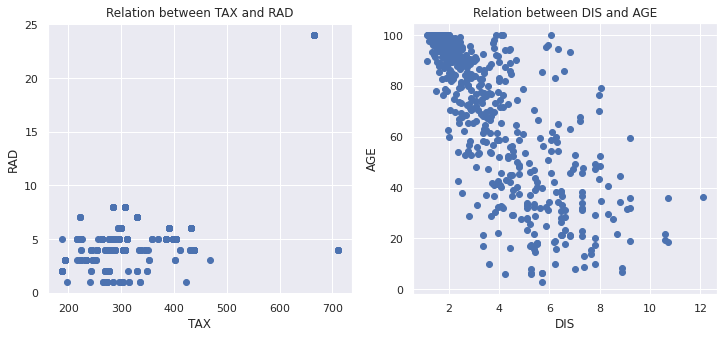

In [ ]:
plt.figure(figsize=(12,5))
features = [['TAX','RAD'],['DIS','AGE']]
for i, col in enumerate(features):
  plt.subplot(1, len(features),i+1)
  x = bos[col[0]]
  y=bos[col[1]]
  plt.scatter(x=x, y=y, marker='o')
  plt.title('Relation between {} and {}'.format(col[0],col[1]))
  plt.xlabel(col[0])
  plt.ylabel(col[1])
plt.show()

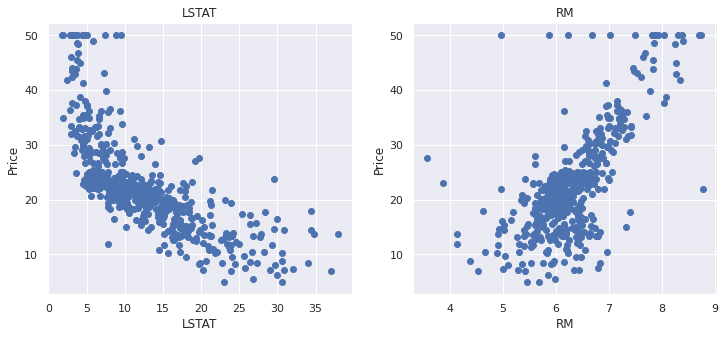

In [ ]:
plt.figure(figsize=(12,5))
features = ['LSTAT','RM']
y = bos['PRICE']
for i, col in enumerate(features):
  plt.subplot(1, len(features),i+1)
  x = bos[col]
  plt.scatter(x=x, y=y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Price')
plt.show()

In [ ]:
# drop correlated features
bos.drop(columns=['TAX','AGE'], inplace=True)

# shape of dataframe
bos.shape

(506, 12)

In [ ]:
bos.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'B', 'LSTAT'],
      dtype='object')

**Outlier analysis**

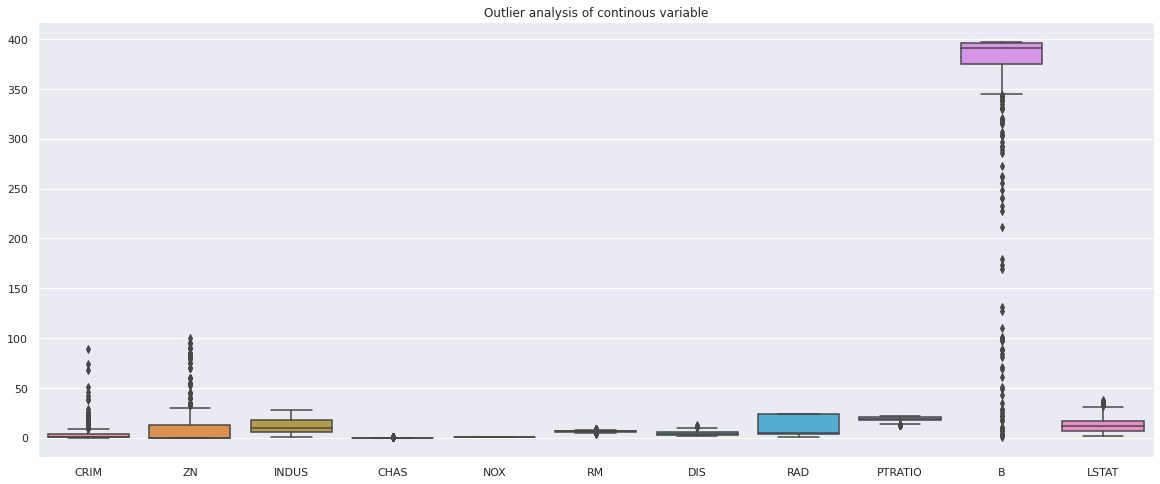

In [ ]:
# Outlier analysis of continous variable
# plot a box plot for find outliers
plt.figure(figsize=(20,8))
plt.title('Outlier analysis of continous variable')
col_names = bos.columns[:-1]
sns.boxplot(data=bos[col_names])
# fig=plt.gcf()


In [ ]:
# Detect outliers and remove it from dataset
def detect_outlier(col_names):
  for i in col_names:
    column_name = i
    print(column_name)

    # find inter-quartile range
    q75, q25 = np.percentile(bos.loc[:,i], [75,25])
    iqr = q75 - q25

    # find lower and upper fence
    lower_fence = round(q25 - (1.5*iqr),4)
    upper_fence = round(q75 + (1.5*iqr),4)
    print('lower_fence :', lower_fence)
    print('upper_fence :', upper_fence)

    # count outliers
    lower_outlier = bos.loc[bos[column_name] < lower_fence].shape[0]
    upper_outlier = bos.loc[bos[column_name] > upper_fence].shape[0]
    print('No of outlier in variable# ' + str(column_name) + " - " ,  lower_outlier + upper_outlier)

    # delete outlier 
    bos.drop(bos[bos.loc[:,column_name] < lower_fence].index, inplace=True)
    bos.drop(bos[bos.loc[:,column_name] > upper_fence].index, inplace=True)


In [ ]:
# call function for delete outliers
detect_outlier(col_names)

CRIM
lower_fence : -5.3105
upper_fence : 9.0696
No of outlier in variable# CRIM -  66
ZN
lower_fence : -30.0
upper_fence : 50.0
No of outlier in variable# ZN -  45
INDUS
lower_fence : -12.5
upper_fence : 36.46
No of outlier in variable# INDUS -  0
CHAS
lower_fence : 0.0
upper_fence : 0.0
No of outlier in variable# CHAS -  34
NOX
lower_fence : 0.2375
upper_fence : 0.8255
No of outlier in variable# NOX -  12
RM
lower_fence : 4.9895
upper_fence : 7.4895
No of outlier in variable# RM -  21
DIS
lower_fence : -1.7797
upper_fence : 9.443
No of outlier in variable# DIS -  0
RAD
lower_fence : -0.5
upper_fence : 11.5
No of outlier in variable# RAD -  55
PTRATIO
lower_fence : 13.95
upper_fence : 23.15
No of outlier in variable# PTRATIO -  8
B
lower_fence : 368.75
upper_fence : 413.79
No of outlier in variable# B -  27
LSTAT
lower_fence : -2.9662
upper_fence : 22.9637
No of outlier in variable# LSTAT -  5


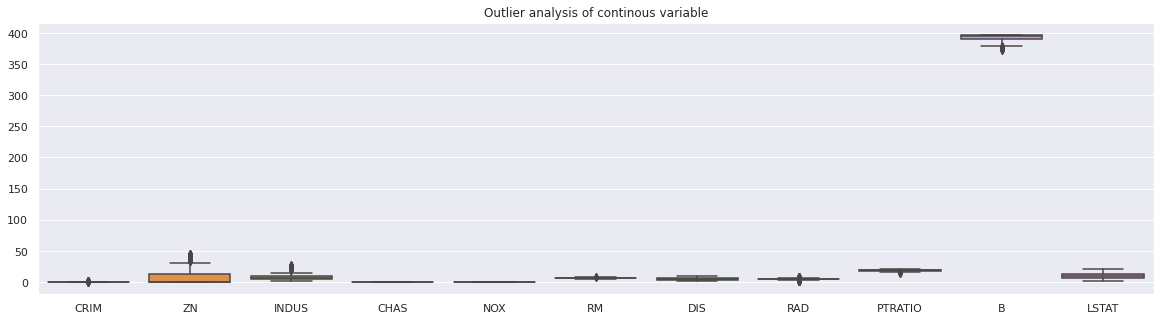

In [ ]:
# Outlier analysis of continous variable
# plot a box plot for find outliers
plt.figure(figsize=(20,5))
plt.title('Outlier analysis of continous variable')
col_names = bos.columns[:-1]
sns.boxplot(data=bos[col_names])
# fig=plt.gcf()


In [ ]:
X = bos.drop('PRICE', axis=1)

Y = bos['PRICE']

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=.25, random_state=345)

In [ ]:
print('shape of X_train {}, x_test {}'.format(X_train.shape, X_test.shape))
print('shape of y_train {}, y_test {}'.format(y_train.shape, y_test.shape))

shape of X_train (174, 11), x_test (59, 11)
shape of y_train (174,), y_test (59,)


# Training the Model

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("-"*40)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("-"*40)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
----------------------------------------
RMSE is 2.842529074303369
R2 score is 0.7613303625546516


The model performance for testing set
----------------------------------------
RMSE is 3.2650425270201993
R2 score is 0.3677473417901018


In [ ]:
# saving the model to the local file system
filename = 'boston_lr_model.pickle'
pickle.dump(lin_model, open(filename, 'wb'))